<a href="https://colab.research.google.com/github/rvoljanin/neuraluniversity/blob/master/notebooks/ai/exercise2/exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Добавляем библиотеки



In [10]:
from tensorflow.keras.datasets import mnist #Библиотека с базой Mnist
from tensorflow.keras.models import Sequential # Подлючаем класс создания модели Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization # Основные слои
from tensorflow.keras.optimizers import Adam # Подключаем оптимизатор Adam
from tensorflow.keras import utils #Утилиты для to_categorical
from tensorflow.keras.preprocessing import image #Для отрисовки изображения
import numpy as np # Подключаем библиотеку numpy
import pylab # Модуль для построения графиков
from mpl_toolkits.mplot3d import Axes3D # Модуль для трехмерной графики
from google.colab import files #Для загрузки своей картинки
import matplotlib.pyplot as plt #Отрисовка изображений
from PIL import Image #Отрисовка изображений
from sklearn.preprocessing import LabelEncoder, StandardScaler # Функции для нормализации данных
from sklearn import preprocessing # Пакет предварительной обработки данных
from sklearn.model_selection import train_test_split

#Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline 

ModuleNotFoundError: No module named 'google.colab'

Описываем модель

In [11]:
# Функция пересоздаёт пустую сеть
def createModel():
    model = Sequential() # Создаём сеть прямого распространения
    model.add(Dense(800, input_dim=784, activation="relu")) # Добавляем полносвязный слой на 800 нейронов с relu-активацией
    model.add(Dense(400, activation="relu")) # Добавляем полносвязный слой на 400 нейронов с relu-активацией
    model.add(Dense(10, activation="softmax")) # Добавляем полносвязный слой на 10 нейронов с softmax-активацией

    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # Компилируем модель
    print(model.summary()) #Вывод структуры модели

    return model # Возвращаем созданную сеть

Визуализируем результаты обучения

In [12]:
def printHistory(hist):
    plt.figure(figsize=(10,10))
    # Выводим график точности на обучающей выборке
    # label - имя графика в легенде
    plt.plot(hist.history['accuracy'], label='Доля верных ответов на обучающем наборе')

    # Выводим график точности на проверочной выборке
    plt.plot(hist.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')

    # Выводим подписи осей
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Доля верных ответов')

    # Выводим легенду
    plt.legend()
    plt.show()

    # Выводим графики ошибки
    plt.figure(figsize=(10,10))
    plt.plot(hist.history['loss'], label='Ошибка на обучающем наборе')
    plt.plot(hist.history['val_loss'], label='Ошибка на проверочном наборе')
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Ошибка')
    plt.legend()
    plt.show()

Формируем наборы данных

In [13]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data() #Загрузка данных Mnist

#Меняем формат входных картинок с 28х28 на 784х1
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)

#Нормализуем входные картинки
x_train = x_train.astype('float32') # преобразовываем x_train в тип float (цифры с плавающей точкой)
x_train = x_train / 255 # делим на 255, чтобы диапазон был от 0 до 1
x_test = x_test.astype('float32') # преобразовываем x_test в тип float (цифры с плавающей точкой)
x_test = x_test / 255 # делим на 255, чтобы диапазон был от 0 до 1

# Преобразуем ответы в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

# Данные для модели обучающейся на базе из 50000 
x_train_model1 = x_train[:50000]
y_train_model1 = y_train[:50000]

x_valid_model1 = x_train[50000:]
y_valid_model1 = y_train[50000:]

# Данные для модели обучающейся на базе из 10000
x_train_model2 = x_train[:10000]
y_train_model2 = y_train[:10000]

x_valid_model2 = x_train[10000:]
y_valid_model2 = y_train[10000:]

# Данные для модели обучающейся на базе из 500
x_train_model3 = x_train[:500]
y_train_model3 = y_train[:500]

x_valid_model3 = x_train[500:]
y_valid_model3 = y_train[500:]

Тренировка модели на 50000

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_4 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
391/391 [==============================] - 2s 5ms/step - loss: 0.2254 - accuracy: 0.9327 - val_loss: 0.1042 - val_accuracy: 0.9688
Epoch 2/50
391/391 [==============================] - 2s 4ms/step - loss: 0.0825 - accuracy: 0.9750 - val_loss: 0.0935 - val_accuracy: 0.9722
Epoch 3/50
391/391 [==============================] - 2s 4ms/step - loss: 0.0492 - accura

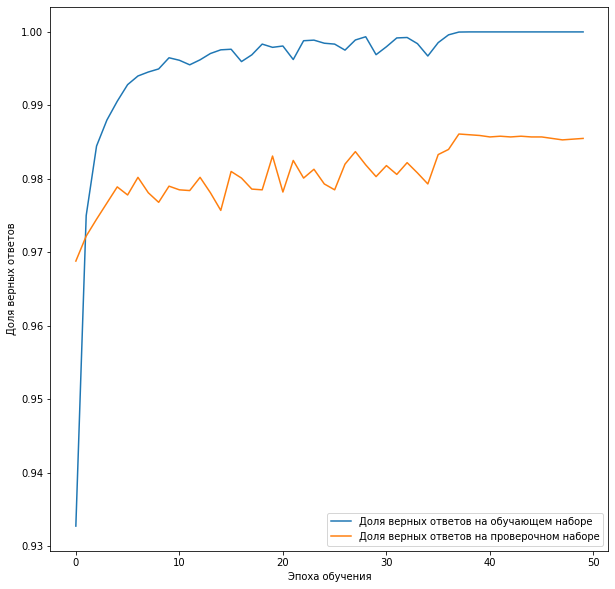

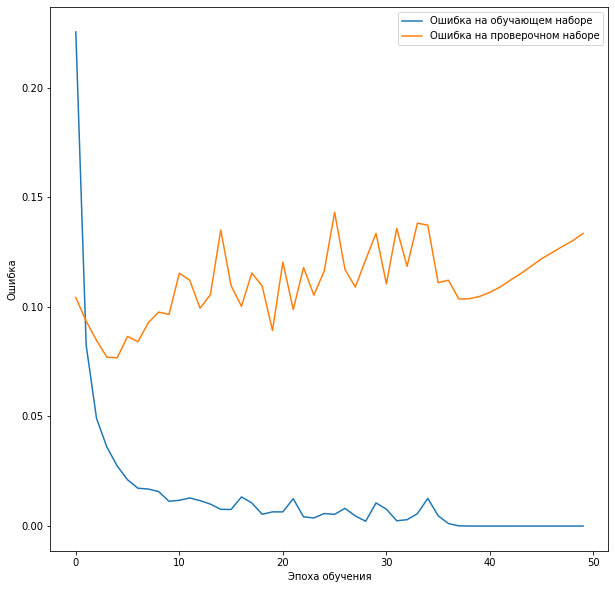

In [14]:
model = createModel()

history = model.fit(x_train_model1, y_train_model1, batch_size=128, epochs=50, verbose=1, validation_data=(x_valid_model1,y_valid_model1))

printHistory(history)

Тренировка модели на 10000

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_7 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
79/79 [==============================] - 2s 19ms/step - loss: 0.4640 - accuracy: 0.8662 - val_loss: 0.2519 - val_accuracy: 0.9241
Epoch 2/50
79/79 [==============================] - 1s 17ms/step - loss: 0.1711 - accuracy: 0.9477 - val_loss: 0.1909 - val_accuracy: 0.9418
Epoch 3/50
79/79 [==============================] - 1s 17ms/step - loss: 0.1082 - accuracy:

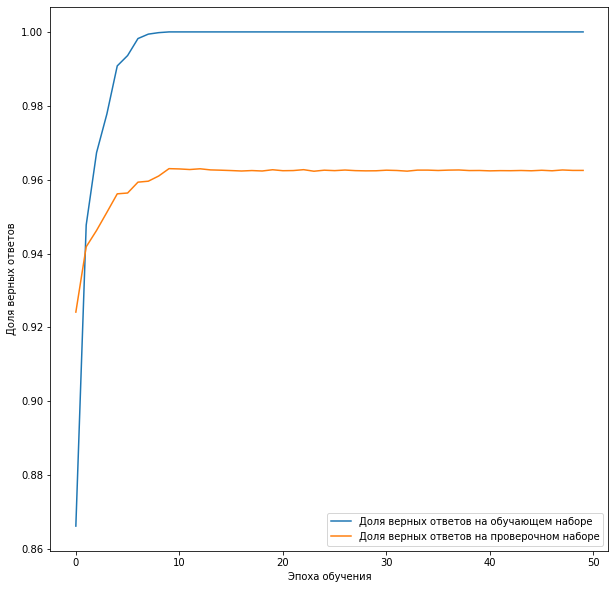

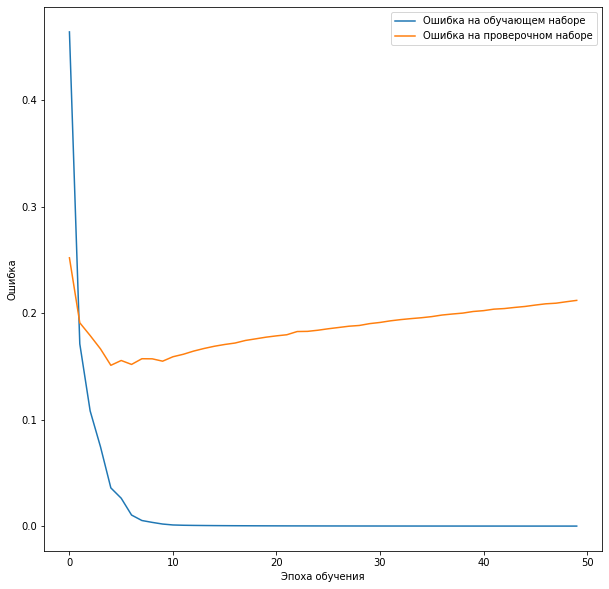

In [15]:
model = createModel()

history = model.fit(x_train_model2, y_train_model2, batch_size=128, epochs=50, verbose=1, validation_data=(x_valid_model2,y_valid_model2))

printHistory(history)

Тренировка модели на 500

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_10 (Dense)             (None, 400)               320400    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
4/4 [==============================] - 1s 361ms/step - loss: 1.8734 - accuracy: 0.4460 - val_loss: 1.3083 - val_accuracy: 0.6965
Epoch 2/50
4/4 [==============================] - 1s 311ms/step - loss: 0.8332 - accuracy: 0.8440 - val_loss: 0.7929 - val_accuracy: 0.7611
Epoch 3/50
4/4 [==============================] - 1s 301ms/step - loss: 0.4241 - accuracy: 0.

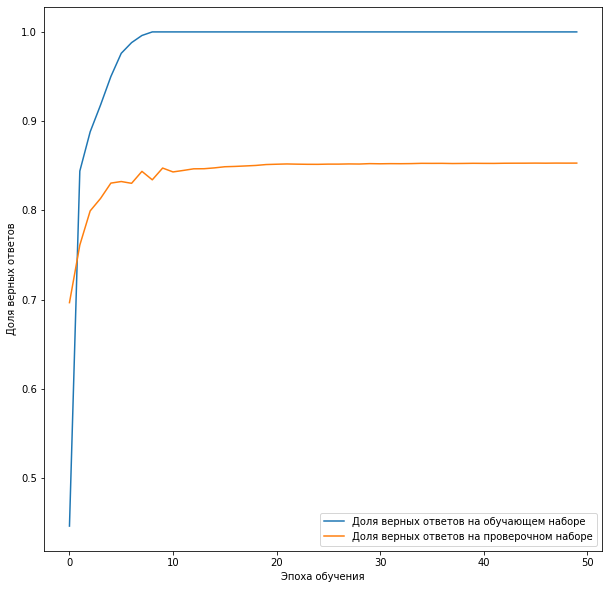

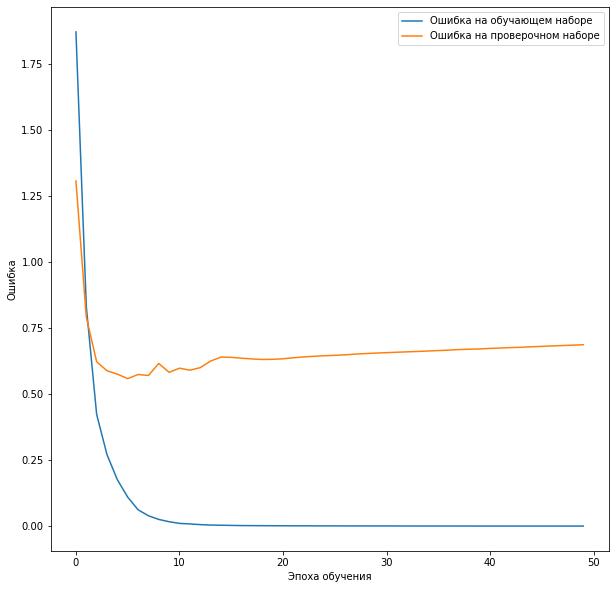

In [16]:
model = createModel()

history = model.fit(x_train_model3, y_train_model3, batch_size=128, epochs=50, verbose=1, validation_data=(x_valid_model3,y_valid_model3))

printHistory(history)